# Document Loading

## Öğrencilere not
Yüksek yük dönemlerinde not defterinin yanıt vermediğini görebilirsiniz. Bir hücre yürütülüyor gibi görünebilir, hücrenin solundaki parantez [#] içindeki tamamlanma numarasını güncelleyebilir ancak hücrenin yürütülmediğini görebilirsiniz. Bu durum özellikle çıktı olmadığında yazdırma ifadelerinde belirgindir. Bu durumda, Çekirdek sekmesi altındaki komutu kullanarak çekirdeği yeniden başlatın.

## Retrieval augmented generation
 
Getirimi artırılmış üretimde (RAG), bir LLM yürütmenin bir parçası olarak harici bir veri kümesinden bağlamsal belgeler alır.

Bu, belirli belgeler (örneğin PDF'lerimiz, bir dizi video vb.) hakkında soru sormak istediğimizde kullanışlıdır.

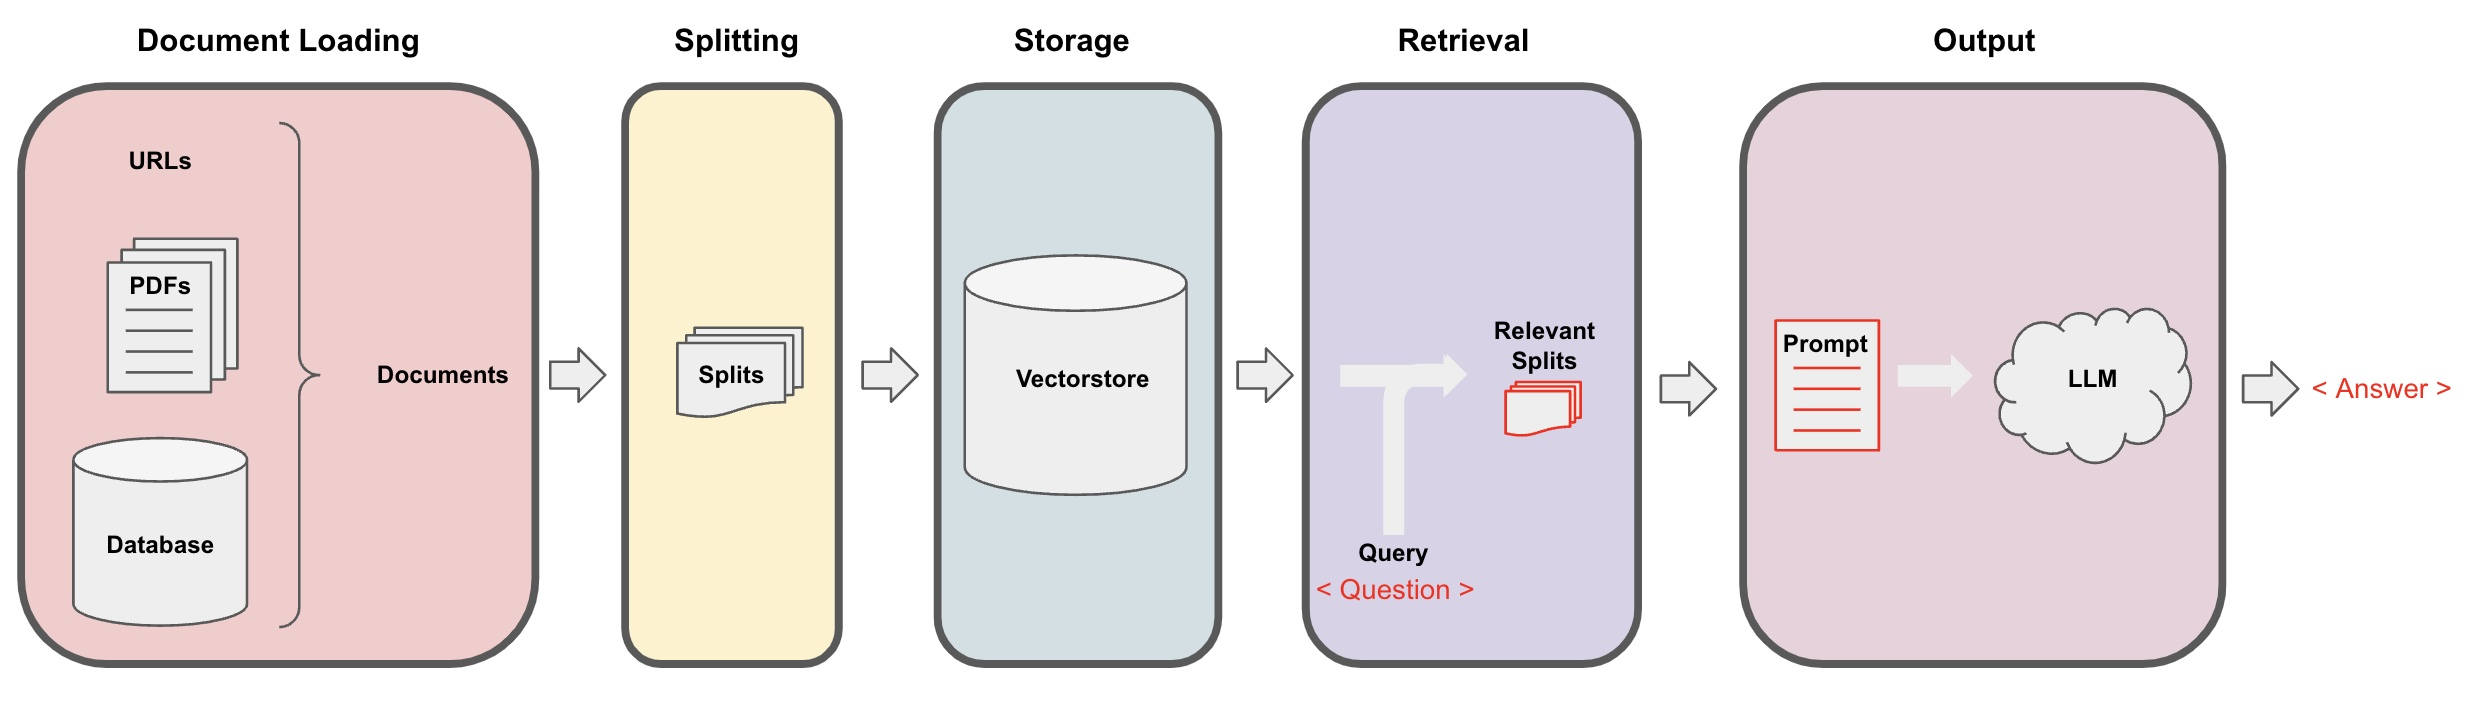

**LangChain, içerisinde 80 tane dataloader methodu barındırır. Aşağıda birkaçı için örnekler verilmiştir.**

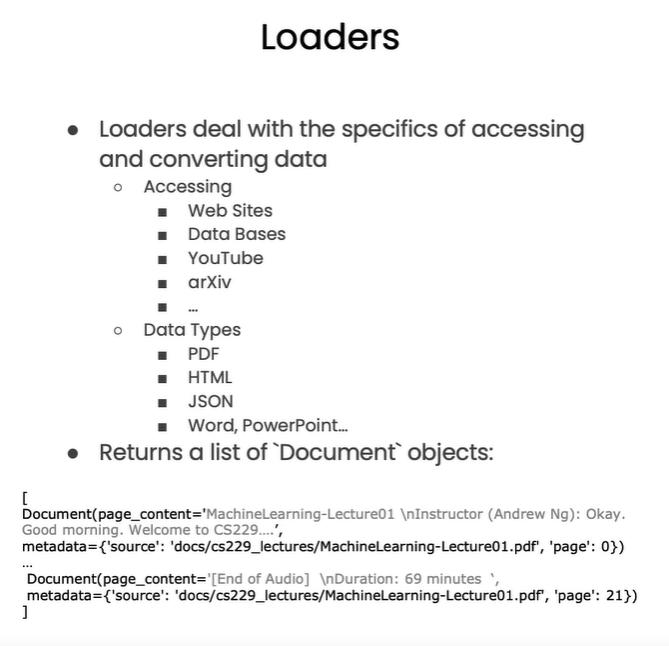

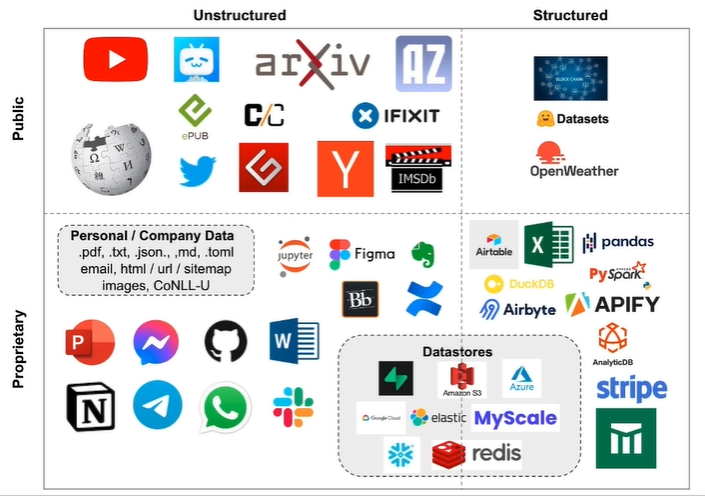

In [ ]:
#! pip install langchain

In [1]:
import os
import openai
import sys
sys.path.append('../..')

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

## PDFs

Andrew Ng'nin ünlü CS229 dersinden bir PDF transkripti yükleyelim! Bu belgeler otomatik transkripsiyonun bir sonucudur, bu nedenle kelimeler ve cümleler bazen beklenmedik şekilde bölünebilir.

In [ ]:
#! pip install pypdf 

In [3]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("docs/MachineLearning-Lecture01.pdf")
pages = loader.load()

Her sayfa bir Belgedir.

Bir Belge metin (page_content) ve meta veri içerir.

In [4]:
len(pages)

22

In [5]:
page = pages[0]

In [6]:
print(page.page_content[0:500])

MachineLearning-Lecture01  
Instructor (Andrew Ng):  Okay. Good morning. Welcome to CS229, the machine 
learning class. So what I wanna do today is ju st spend a little time going over the logistics 
of the class, and then we'll start to  talk a bit about machine learning.  
By way of introduction, my name's  Andrew Ng and I'll be instru ctor for this class. And so 
I personally work in machine learning, and I' ve worked on it for about 15 years now, and 
I actually think that machine learning i


In [7]:
page.metadata

{'source': 'docs/MachineLearning-Lecture01.pdf', 'page': 0}

## YouTube

In [3]:
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.parsers import OpenAIWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [ ]:
# ! pip install yt_dlp
# ! pip install pydub

**Not**: Bu işlemin tamamlanması birkaç dakika sürebilir.

In [4]:
url="https://www.youtube.com/watch?v=jGwO_UgTS7I"
save_dir="docs/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url],save_dir),
    OpenAIWhisperParser()
)
docs = loader.load()

[youtube] Extracting URL: https://www.youtube.com/watch?v=jGwO_UgTS7I
[youtube] jGwO_UgTS7I: Downloading webpage
[youtube] jGwO_UgTS7I: Downloading ios player API JSON
[youtube] jGwO_UgTS7I: Downloading android player API JSON
[youtube] jGwO_UgTS7I: Downloading m3u8 information
[info] jGwO_UgTS7I: Downloading 1 format(s): 140
[download] docs\youtube\Stanford CS229： Machine Learning Course, Lecture 1 - Andrew Ng (Autumn 2018).m4a has already been downloaded
[download] 100% of   69.71MiB
[ExtractAudio] Not converting audio docs\youtube\Stanford CS229： Machine Learning Course, Lecture 1 - Andrew Ng (Autumn 2018).m4a; file is already in target format m4a
Transcribing part 1!
Transcribing part 2!
Transcribing part 3!
Transcribing part 4!


In [ ]:
docs[0].page_content[0:500]

## URLs

In [ ]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://github.com/basecamp/handbook/blob/master/37signals-is-you.md")

In [ ]:
docs = loader.load()

In [ ]:
print(docs[0].page_content[:500])

Alt sayfalar ile birlikte tüm website ı yüklemek isteniyor ise [Recursive URL Loader](https://python.langchain.com/docs/modules/data_connection/document_loaders/integrations/recursive_url_loader) kullanılabilir. 

In [5]:
from langchain.document_loaders.recursive_url_loader import RecursiveUrlLoader

In [6]:
url = 'https://js.langchain.com/docs/modules/memory/examples/'
loader=RecursiveUrlLoader(url=url)
docs=loader.load()

In [7]:
len(docs)

12

In [8]:
docs[0].page_content[:50]

'\n\n\n\n\nConversation Summary Memory | 🦜️🔗 Langchain\n\n'

In [9]:
docs[0].metadata

{'source': 'https://js.langchain.com/docs/modules/memory/examples/conversation_summary',
 'title': 'Conversation Summary Memory | 🦜️🔗 Langchain',
 'description': 'The Conversation Summary Memory summarizes the conversation as it happens and stores the current summary in memory. This memory can then be used to inject the summary of the conversation so far into a prompt/chain. This memory is most useful for longer conversations, where keeping the past message history in the prompt verbatim would take up too many tokens.',
 'language': 'en'}

**Not**: Bu işlemin tamamlanması birkaç dakika sürebilir.

In [10]:
url = 'https://js.langchain.com/docs/'
exclude_dirs=['https://js.langchain.com/docs/api/']
loader=RecursiveUrlLoader(url=url,exclude_dirs=exclude_dirs)
docs=loader.load()

In [11]:
len(docs)

184

In [12]:
docs[0].page_content[:50]

'\n\n\n\n\nCustom Agents | 🦜️🔗 Langchain\n\n\n\n\n\nSkip to ma'

In [13]:
docs[0].metadata

{'source': 'https://js.langchain.com/docs/modules/agents/agents/custom/',
 'title': 'Custom Agents | 🦜️🔗 Langchain',
 'description': 'See the examples below on how to create custom agents.',
 'language': 'en'}

## Notion

[Bunun](https://yolospace.notion.site/Blendle-s-Employee-Handbook-e31bff7da17346ee99f531087d8b133f) gibi örnek bir Notion sitesi için [buradaki](https://python.langchain.com/docs/modules/data_connection/document_loaders/integrations/notion) adımları izleyin:

* Sayfayı kendi Notion alanınızda çoğaltın ve Markdown / CSV olarak dışa aktarın.
* Sıkıştırmayı açın ve Notion sayfası için markdown dosyasını içeren bir klasör olarak kaydedin.
 

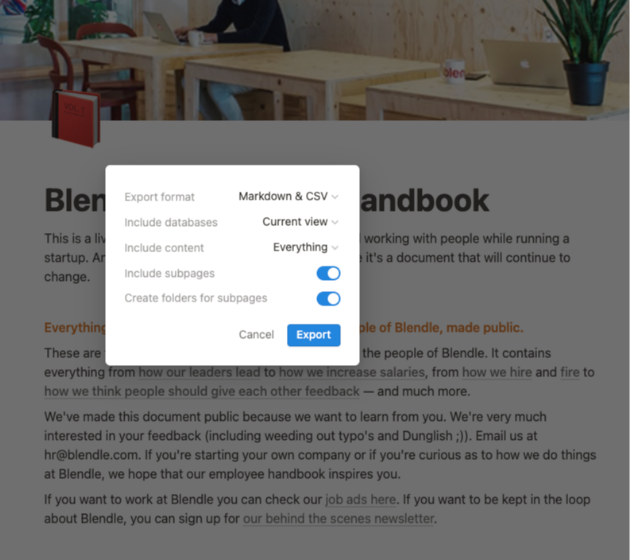

In [ ]:
from langchain.document_loaders import NotionDirectoryLoader
loader = NotionDirectoryLoader("docs/Notion_DB")
docs = loader.load()

In [ ]:
print(docs[0].page_content[0:200])

In [ ]:
docs[0].metadata